In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import os
import glob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import pickle
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
import nltk
import re
import torch.nn as nn
from bs4 import BeautifulSoup 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from nltk.translate.bleu_score import sentence_bleu
import nltk
from nltk.corpus import stopwords
import random
from collections import Counter

In [0]:
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [0]:
 def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = word_tokenize(newString)
    return newString
    # soln_doc=[]
    # for word in newString:
    #   if word.lower() not in stop_words and word!='':
    #     soln_doc.append(word.lower())
    # return soln_doc
   
data=pd.read_csv("/content/articles.csv", encoding='unicode_escape')
cleaned_text = []
for t in data['text']:
    cleaned_text.append(text_cleaner(t))
data['text']=cleaned_text
cleaned_text = []
for t in data['title']:
    cleaned_text.append(text_cleaner(t))
data['title']=cleaned_text
print (data['text'][9])
print (data['title'][9])
title=data['title']
content=data['text']

['over', 'the', 'past', 'months', 'i', 've', 'been', 'interviewing', 'at', 'various', 'companies', 'like', 'google', 's', 'deepmind', 'wadhwani', 'institute', 'of', 'ai', 'microsoft', 'ola', 'fractal', 'analytics', 'and', 'a', 'few', 'others', 'primarily', 'for', 'the', 'roles', 'data', 'scientist', 'software', 'engineer', 'research', 'engineer', 'in', 'the', 'process', 'not', 'only', 'did', 'i', 'get', 'an', 'opportunity', 'to', 'interact', 'with', 'many', 'great', 'minds', 'but', 'also', 'had', 'a', 'peek', 'at', 'myself', 'along', 'with', 'a', 'sense', 'of', 'what', 'people', 'really', 'look', 'for', 'when', 'interviewing', 'someone', 'i', 'believe', 'that', 'if', 'i', 'd', 'had', 'this', 'knowledge', 'before', 'i', 'could', 'have', 'avoided', 'many', 'mistakes', 'and', 'have', 'prepared', 'in', 'a', 'much', 'better', 'manner', 'which', 'is', 'what', 'the', 'motivation', 'behind', 'this', 'post', 'is', 'to', 'be', 'able', 'to', 'help', 'someone', 'bag', 'their', 'dream', 'place', 'o

In [0]:
def save_doc():
    c = 0
    data=[]
    lmtz = WordNetLemmatizer()
    docname_id_mapping = []
    for name in glob.glob('/content/BBC News Summary/Summaries/business/*'):
        for i in glob.glob(name):
            with open(i) as file:
                doc=[]
                for line in file:
                    doc += word_tokenize(line)
                doc = [re.sub('[^A-Za-z]+', ' ', word) for word in doc]
                doc = [word.split(' ') for word in doc if word != ' ']
                soln_doc = []
                for line in doc:
                    for word in line:
                        if word.lower() not in stop_words and word!='':
                        # if word != '':
                            soln_doc.append(word.lower())
                soln_doc = [lmtz.lemmatize(word) for word in soln_doc]
                data.append(soln_doc)
                # docname_id_mapping.append(fil)
            # print(c)
            c += 1

    with open('/content/drive/My Drive/IR Dataset/BBC_business_title.txt','wb') as fp:
        pickle.dump(data,fp)

In [0]:
save_doc()

In [0]:
with open('/content/drive/My Drive/IR Dataset/BBC_business_title.txt', 'rb') as fp:
    title = pickle.load(fp)
with open('/content/drive/My Drive/IR Dataset/BBC_business_content.txt', 'rb') as fp:
    content = pickle.load(fp)


In [0]:
!unzip '/content/drive/My Drive/IR Dataset/department-of-justice-20092018-press-releases.zip'
!unzip '/content/drive/My Drive/IR Dataset/news-summary.zip'
!unzip '/content/drive/My Drive/IR Dataset/medium-articles.zip'
# !unzip '/content/drive/My Drive/IR Dataset/bbc-news-summary.zip'

Archive:  /content/drive/My Drive/IR Dataset/department-of-justice-20092018-press-releases.zip
  inflating: combined.json           
Archive:  /content/drive/My Drive/IR Dataset/news-summary.zip
  inflating: news_summary.csv        
  inflating: news_summary_more.csv   
Archive:  /content/drive/My Drive/IR Dataset/medium-articles.zip
  inflating: articles.csv            


In [0]:
## For all data !!
title=[]
content=[]
with open('/content/drive/My Drive/IR Dataset/BBC_business_title.txt', 'rb') as fp:
    title = pickle.load(fp)
title=title[:150]
with open('/content/drive/My Drive/IR Dataset/BBC_business_content.txt', 'rb') as fp:
    content = pickle.load(fp)
content=content[:150]
data=pd.read_csv("/content/articles.csv", encoding='unicode_escape')
c=0
for t in data['title']:
    c=c+1
    title.append(text_cleaner(t))
    if c==150:
      break
c=0
for t in data['text']:
    c=c+1
    content.append(text_cleaner(t))
    if c==150:
      break
data=pd.read_csv("/content/news_summary.csv", encoding='unicode_escape')
c=0
for t in data['headlines']:
    c=c+1
    title.append(text_cleaner(t))  
    if c==150:
      break 
c=0
for t in data['text']:
    c=c+1
    content.append(text_cleaner(t))
    if c==150:
      break 
data=pd.read_csv("/content/news_summary_more.csv", encoding='unicode_escape')
c=0
for t in data['headlines']:
    c=c+1
    title.append(text_cleaner(t))
    if c==150:
      break 
c=0
for t in data['text']:
    c=c+1
    content.append(text_cleaner(t))
    if c==150:
      break 



In [0]:
from gensim.models import KeyedVectors
filename = '/content/drive/My Drive/DL/ASS2/Q2/GoogleNews-vectors-negative300.bin'
md = KeyedVectors.load_word2vec_format(filename, binary=True,limit=25000)
# md = read_word_embedding(filename)

In [0]:
md.similar_by_vector(md['word'])[0][0]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'word'

In [0]:
def transform_data(data, length):
        
    train_x = [[] for i in range(len(data))]
    for i in range(len(data)):
    # print(i)
        for word in data[i]:
            if word not in md:
                continue
            trans_word = md[word]
            train_x[i].append(trans_word.tolist())

        train_x[i] = np.array(train_x[i])

    z = np.zeros((length, 300), dtype=int)
    for i in range(len(train_x)):
        if train_x[i].shape[0] == 0:
            train_x[i] = z

    sequence_length = length
    l = []
    for i, review in enumerate(train_x):
    # print(i)
    # print(review.shape)
        review_len=review.shape[0]
        # print(review_len, sequence_length)
        if (review_len<=sequence_length):
            zeros=np.zeros((sequence_length-review_len, 300), dtype=int)
            new=np.concatenate((review, zeros), axis=0)
            # print(new)
        else:
            new=review[:sequence_length]
        l.append(new)
  # td[i]=np.array(new)
  # print(td[i,:].shape, new.shape)
  # print(i, td[i],"NEw", new)

    train = np.array(l)
    # label_encoder = preprocessing.LabelEncoder() 
    # y = label_encoder.fit_transform(data['sentiment']) 

    return train
  

In [0]:
content = transform_data(content, 200)
title = transform_data(title, 20)
content_train, content_test, title_train, title_test = train_test_split(content, title, test_size=0.2, random_state=35)
print(len(content_train),len(title_train),len(title_test),len(content_test))

336 336 1 1


In [0]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [0]:
class Encoder(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, embedding_dim, hidden_dim, n_layers, drop_prob=0.1):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        # embedding_dim = embedding_dim.long()
        # vocab_size = vocab_size.long()

        #Embedding and LSTM layers
        # self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True,bidirectional=True)
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()
        
        #Embadding and LSTM output
        # x = x.long()
        # print(x.shape)
        # embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(x, hidden)
        lstm_out=lstm_out.contiguous().view(lstm_out.shape[0], lstm_out.shape[1]*lstm_out.shape[2] )

        return lstm_out, hidden
    
    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (is_cuda):
            
            hidden = (weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [0]:
embedding_dim = 300
hidden_dim = 5
n_layers = 2

encoder = Encoder(embedding_dim, hidden_dim, n_layers)
print(encoder)

Encoder(
  (lstm): LSTM(300, 5, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
)


In [0]:
class Decoder(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.1):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        
        # embedding_dim = embedding_dim.long()
        # vocab_size = vocab_size.long()

        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True,bidirectional=True)
        
        #dropout layer
        # self.dropout=nn.Dropout(0.2)
        # self.dec_embedding=nn.Embedding(vocab_size, embedding_dim)
        # self.dec_lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)

        #Linear and sigmoid layer
        self.fc1=nn.Linear(20000, output_size*300)
        # self.fc2=nn.Linear(64, output_size)
        # self.fc3=nn.Linear(16,output_size)
        # self.sigmoid=nn.Sigmoid()
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()
        #Embadding and LSTM output
        x = x.long()
        # print(x.shape)
        embedd=self.embedding(x)
        # print(embedd.shape, x.shape)
        lstm_out, hidden=self.lstm(embedd, hidden)

        # lstm_out = lstm_out.long()
        # dec_emb = self.dec_embedding(lstm_out)
        # dec_out, dec_hid = self.dec_lstm(dec_emb, hidden)
        # print(lstm_out.shape)
        #stack up the lstm output
        lstm_out=lstm_out.contiguous().view(lstm_out.shape[0], lstm_out.shape[1]*lstm_out.shape[2] )
        
        #dropout and fully connected layers
        # out=self.dropout(lstm_out)
        # print(lstm_out.shape)
        out=self.fc1(lstm_out)
        # print(out)
        # out=self.dropout(out)
        # out=self.fc2(out)
        # out=self.dropout(out)
        # out=self.fc3(out)
        # out=self.sigmoid(out)
        # print(sig_out.shape)
        # sig_out=sig_out.view(50, -1)
        # print(sig_out.shape)
        # sig_out=sig_out[:, -1]
        # print(sig_out.shape)

        return out, hidden

In [0]:
vocab_size = 300 # +1 for the 0 padding
output_size = 20
embedding_dim = 20
hidden_dim = 5
n_layers = 2

decoder = Decoder(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(decoder)

Decoder(
  (embedding): Embedding(300, 20)
  (lstm): LSTM(20, 5, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (fc1): Linear(in_features=20000, out_features=6000, bias=True)
)


In [0]:
import warnings
warnings.filterwarnings("ignore")
state_dict = torch.load('/content/drive/My Drive/IR_Models/sw_medium_news_encoder.pth')
encoder.load_state_dict(state_dict)
encoder.eval()
state_dict = torch.load('/content/drive/My Drive/IR_Models/sw_medium_news_decoder.pth')
decoder.load_state_dict(state_dict)
decoder.eval()
counter = 0
batch_size = 4
output_size = 20
criterion = nn.L1Loss()
enc_optimizer = torch.optim.Adam(encoder.parameters(), lr=0.001)
dec_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.001)

encoder.cuda()
decoder.cuda()
encoder.train()
decoder.train()

# val_h = net.init_hidden(len(content_test))
# val_inp = torch.FloatTensor(content_test[0])
# val_inp = torch.stack([val_inp,torch.FloatTensor(content_test[1])],dim=0)
# val_tar = torch.FloatTensor(valid_y)
# # print(inp.shape,tar.shape, type(tar))
# for j in range(2, len(content_test), 2):
#     temp = torch.FloatTensor(content_test[j])
#     temp = torch.stack([temp,torch.FloatTensor(content_test[j+1])],dim=0)
#     val_inp = torch.cat([val_inp, temp], dim=0)
    
n_epochs = 150

for epoch in range(1, n_epochs + 1):

    tl = 0
    correct = 0
    h = encoder.init_hidden(batch_size)

    for i in range(0, len(content_train), batch_size):
        if(i+4>len(content_train)):
          break

        counter+=1

        h = [each.data for each in h]

        inp = torch.FloatTensor(content_train[i])
        inp = torch.stack([inp,torch.FloatTensor(content_train[i+1])],dim=0)
        tar = torch.FloatTensor(title_train[i:i+batch_size])
        for j in range(i+2, i+batch_size, 2):
            temp = torch.FloatTensor(content_train[j])
            temp = torch.stack([temp,torch.FloatTensor(content_train[j+1])],dim=0)
            inp = torch.cat([inp, temp], dim=0)

        input_seq = torch.Tensor(inp).cuda()
        target_seq = torch.Tensor(tar).cuda()

        enc_optimizer.zero_grad()
        dec_optimizer.zero_grad()

        enc_output, enc_h = encoder(input_seq, h)
        
        output, h = decoder(enc_output, enc_h)
        tar = tar.reshape(batch_size, tar.shape[1]*tar.shape[2])

        if is_cuda:
            output = output.cuda()
            tar = tar.cuda()

        loss = criterion(output, tar)
        loss.backward()
        enc_optimizer.step()
        dec_optimizer.step()

        output = output.cpu()
        output = output.detach().numpy()
        output = output.reshape(batch_size, output_size,300).tolist()

        tar = tar.cpu()
        tar = tar.detach().numpy()
        tar = tar.reshape(batch_size,  output_size,300).tolist()

        if(epoch % 50 == 0):
          torch.save(encoder.state_dict(), '/content/drive/My Drive/IR_Models/sw_medium_news_encoder.pth')
          torch.save(decoder.state_dict(), '/content/drive/My Drive/IR_Models/sw_medium_news_decoder.pth')

            # for b in range(len(output)):
            #     for wv in output[b]:
            #         print("Prediction ",md.similar_by_vector(np.array(wv)))
            #     for wv in tar[b]:
            #         # print(wv,len(wv))
            #         print("Actual ",md.similar_by_vector(np.array(wv)))
            
        print(epoch,i, loss.item())
        



In [0]:
import warnings
warnings.filterwarnings("ignore")
state_dict = torch.load('/content/drive/My Drive/IR_Models/sw_medium_news_encoder.pth')
encoder.load_state_dict(state_dict)
encoder.eval()
state_dict = torch.load('/content/drive/My Drive/IR_Models/sw_medium_news_decoder.pth')
decoder.load_state_dict(state_dict)
decoder.eval()
batch_size=1

encoder.cuda()
decoder.cuda()

# val_h = encoder.init_hidden(batch_size)
# val_inp = torch.FloatTensor(content_train[0])
# val_inp = torch.stack([val_inp,torch.FloatTensor(content_train[1])],dim=0)
# val_tar = torch.FloatTensor(title_train)
# # print(inp.shape,tar.shape, type(tar))
# for j in range(2, len(content_train), 2):
#     temp = torch.FloatTensor(content_train[j])
#     temp = torch.stack([temp,torch.FloatTensor(content_train[j+1])],dim=0)
#     val_inp = torch.cat([val_inp, temp], dim=0)

bs = []
dist = []
cosin=[]
h = encoder.init_hidden(batch_size)
for i in range(0, len(content_test), batch_size):

        # counter+=1
        val_h = [each.data for each in h]

        # inp = torch.FloatTensor(content_train[i])
        # inp = torch.stack([inp,torch.FloatTensor(content_train[i+1])],dim=0)
        # tar = torch.FloatTensor(title_train[i:i+batch_size])
        # for j in range(i+2, i+batch_size, 2):
        #     temp = torch.FloatTensor(content_train[j])
        #     temp = torch.stack([temp,torch.FloatTensor(content_train[j+1])],dim=0)
        #     inp = torch.cat([inp, temp], dim=0)

        inp=content_test[i][np.newaxis,:,:]
        # print(inp.shape)
        tar=title_test[i][np.newaxis,:,:]

        input_seq = torch.Tensor(inp).cuda()
        target_seq = torch.Tensor(tar).cuda()

        # enc_optimizer.zero_grad()
        # dec_optimizer.zero_grad()

        enc_output, enc_h = encoder(input_seq, val_h)
        
        output, h = decoder(enc_output, enc_h)
        # tar = tar.reshape(batch_size, tar.shape[1]*tar.shape[2])

        # if is_cuda:
        #     output = output.cuda()
        #     tar = tar.cuda()

        # loss = criterion(output, tar)
        # loss.backward()
        # enc_optimizer.step()
        # dec_optimizer.step()

        output = output.cpu()
        output = output.detach().numpy()
        output = output.reshape(batch_size, output_size,300).tolist()

        # tar = tar.cpu()
        # tar = tar.detach().numpy()
        tar = tar.reshape(batch_size,  output_size,300).tolist()

        y_pred = []
        y_true = []
        predict=""
        actual=""
        for b in range(len(output)):
            for wv in output[b]:
                # print("Prediction ",md.similar_by_vector(np.array(wv))[0][0])
                if(md.similar_by_vector(np.array(wv))[0][1]>0.35):
                  y_pred.append(md.similar_by_vector(np.array(wv))[0][0])
                  predict=predict+md.similar_by_vector(np.array(wv))[0][0]+" "
                else:
                  break
            for wv in tar[b]:
              if(md.similar_by_vector(np.array(wv))[0][1]>0.35):
                y_true.append(md.similar_by_vector(np.array(wv))[0][0])
                actual=actual+md.similar_by_vector(np.array(wv))[0][0]+" "
              else:
                break
            if len(y_true)==0 or len(y_pred)==0 :
                continue
            bs.append(sentence_bleu([y_pred],y_true,weights=[1]))
            dist.append(md.wv.n_similarity(y_true, y_pred))
            cosin.append(cosine(y_pred,y_true))

            print("actual: ",actual)
            print("predicted: ",predict)
            print("bLUE :",sentence_bleu([y_pred],y_true,weights=[1]),"distance:",md.wv.n_similarity(y_true, y_pred),"cosine:",cosine(y_pred,y_true))
            print()

print("BS avg = ", (sum(bs)/len(bs)), "Dist avg = ", (sum(dist)/len(dist)),"Cosine Avg = ",(sum(cosin)/len(cosin)))

In [0]:
def cosine(pred,actual):
    t1=[]
    t2=[]
    counter = Counter(pred)
    for j in actual:
        c=counter[j]
        t1.append(c)
    counter = Counter(actual)
    for j in actual:
        c=counter[j]
        t2.append(c)
    if np.linalg.norm(t1)>0:
        cos_sim = np.dot(t2, t1)/(np.linalg.norm(t2)*np.linalg.norm(t1))
    else:
        cos_sim=0
    return cos_sim

In [0]:
torch.save(encoder.state_dict(), '/content/drive/My Drive/IR_Models/sw_medium_news_encoder.pth')
torch.save(decoder.state_dict(), '/content/drive/My Drive/IR_Models/sw_medium_news_decoder.pth')

In [0]:
title1=[]
title2=[]
title3=[]
title4=[]
data=pd.read_csv("/content/articles.csv", encoding='unicode_escape')
for t in data['title']:
    title1.append(text_cleaner(t))
vocab=[w for txt in title1 for w in txt]
c = Counter(vocab)
title1=[]
for i in c.most_common(200):
  title1.append(i[0])
data=pd.read_csv("/content/news_summary.csv", encoding='unicode_escape')
for t in data['headlines']:
    title2.append(text_cleaner(t))   
vocab=[w for txt in title2 for w in txt]
c = Counter(vocab)
title2=[]
for i in c.most_common(200):
  title2.append(i[0])
data=pd.read_csv("/content/news_summary_more.csv", encoding='unicode_escape')
for t in data['headlines']:
    title3.append(text_cleaner(t))
vocab=[w for txt in title3 for w in txt]
c = Counter(vocab)
title3=[]
for i in c.most_common(200):
  title3.append(i[0])
with open('/content/drive/My Drive/IR Dataset/BBC_business_title.txt', 'rb') as fp:
    title4 = pickle.load(fp)
vocab=[w for txt in title4 for w in txt]
c = Counter(vocab)
title4=[]
for i in c.most_common(200):
  title4.append(i[0])


In [0]:
print(len(title1),len(title2),len(title3),len(title4))
ls1=[]
ls2=[]
ls3=[]
ls4=[]
for word in title1:
    if word not in md:
        continue
    trans_word = md[word]
    ls1.append(trans_word.tolist())
for word in title2:
    if word not in md:
        continue
    trans_word = md[word]
    ls2.append(trans_word.tolist())
for word in title3:
    if word not in md:
        continue
    trans_word = md[word]
    ls3.append(trans_word.tolist())
for word in title4:
    if word not in md:
        continue
    trans_word = md[word]
    ls4.append(trans_word.tolist())


ls1 = np.array(ls1)
ls2 = np.array(ls2)
ls3 = np.array(ls3)
ls4 = np.array(ls4)

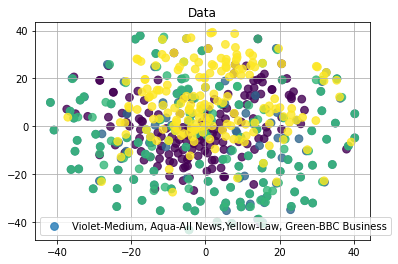

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=0)

feature = []
labels = []

for i in ls1:
    feature.append(i)
    labels.append(0)
for i in ls2:
    feature.append(i)
    labels.append(1)
for i in ls3:
    feature.append(i)
    labels.append(2)
for i in ls4:
    feature.append(i)
    labels.append(3)


transformed_data = tsne.fit_transform(np.array(feature))
k = np.array(transformed_data)
plt.scatter(k[:, 0], k[:, 1], c=labels, s=60, alpha=0.8,label="Violet-Medium, Aqua-All News,Yellow-Law, Green-BBC Business")
plt.title("Data")
plt.legend()
plt.grid(True)
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def Bar_graph(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t):
    barWidth = 0.1
    bars1 = [a,b,c,d]
    bars2 = [e,f,g,h]
    bars3=[i,j,k,l]
    bars4=[m,n,o,p]
    bars5=[q,r,s,t]
    # bars4=[d,h,l]
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3=[x + barWidth for x in r2]
    r4=[x + barWidth for x in r3]
    r5=[x + barWidth for x in r4]
    plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black',  capsize=5,label='Spacy')
    plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black',capsize=5, label='Vanilla RNN')
    plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black',  capsize=5,label='LSTM')
    plt.bar(r4, bars4, width = barWidth, color = 'orange', edgecolor = 'black',  capsize=7,label='LSTM with BS')
    plt.bar(r5, bars5, width = barWidth, color = 'red', edgecolor = 'black',  capsize=7,label='LSTM with Attn')
    plt.xticks([r + barWidth for r in range(len(bars1))], [ 'Medium Tech ','BBC Business  ','Law Data','News Summary'])
    # plt.xticks([r + barWidth for r in range(len(bars1))], ['NB with TF-IDF', 'KNN with TF-IDF','NB with MI','KNN with MI'])

    plt.ylabel('Distance Similarity')
    plt.xlabel('Datasets')
    # 
    # plt.legend(loc='upper left', frameon=False)
    # loc='best'
    # bbox_to_anchor=(0.5, 0.5,0.5, 0.5, 0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.legend()
    plt.title("Distance Similarity for different models on differen datasets")
    plt.show()